In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [250]:
df = pd.read_csv('pieces.csv', index_col="Distance(m)")
df = df.iloc[1:]
df2 = df.replace(",",".", regex=True).applymap(float)
df.update(df2)

In [251]:
df = df.applymap(float).T
name_list = [i for i in range(1, 43)]


In [252]:
df.columns = [1,2,4,5,6]
df = df.T
df.columns = name_list
df = df.T

(array([[ 0.,  0.,  0.,  0.,  2., 15., 20.,  5.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4., 19., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  8., 11., 12.,  4.,  2.,  3.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  7., 10.,  8.,  9.,  3.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  2.,  0.,  1.],
        [ 1.,  1.,  1.,  4.,  8., 10.,  4.,  6.,  2.,  1.,  1.,  1.,  2.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([-270. , -225.2, -180.4, -135.6,  -90.8,  -46. ,   -1.2,   43.6,
          88.4,  133.2,  178. ,  222.8,  267.6,  312.4,  357.2,  402. ,
         446.8,  491.6,  536.4,  581.2,  626. ]),
 <a list of 5 BarContainer objects>)

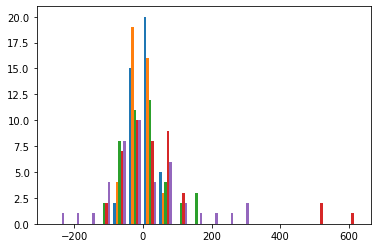

In [253]:
pop = df
N = len(pop)
num_bins = 20
plt.hist(pop, bins=num_bins)



In [254]:
def random_color():
    rgbl=[255,0,0]
    np.random.shuffle(rgbl)
    return tuple(rgbl)

/tmp/ipykernel_1654/1041477793.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label=i, color=np.random.choice(color))
/tmp/ipykernel_1654/1041477793.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label=i, color=np.random.choice(color))
/tmp/ipykernel_1654/1041477793.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label=i, color=np.random.choice(color))
/tmp/ipykernel_1654/1041477793.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0

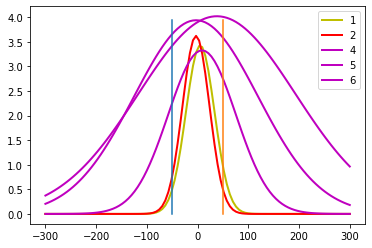

In [267]:
x = np.linspace(-300, 300, 100)
for i in df.columns: 
    pop = df[i]
    color = [*"rgbcmyk"]
    bin_width = (pop.max() - pop.min()) / num_bins
    p = norm.cdf(x, pop.mean(), pop.std())
    p = norm.pdf(x, pop.mean(), pop.std())* N * bin_width
    plt.plot(x, p, 'k', linewidth=2, label=i, color=np.random.choice(color))
    plt.legend()
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

0.02488232042340012 0.9441555014740816
0.039239747225918914 0.9770330320691631
0.18953777021860047 0.7315778848634751
0.2851344211990674 0.530815640532551
0.3504354451157773 0.668011513351316


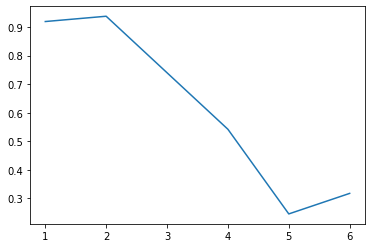

In [289]:
degringolade = {}
for i in df.columns:
    pop = df[i]
    pmin = norm(pop.mean(), pop.std()).cdf(-50)
    pmax = norm(pop.mean(), pop.std()).cdf(50)
    degringolade[i] = pmax - pmin
    print(pmin, pmax)
yeah = degringolade.items()
x,y = zip(*yeah)
plt.plot(x,y)